  **Описание проекта**
    
    Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки

**Описание данных**

    -Hypothesis — краткое описание гипотезы;
    -Reach — охват пользователей по 10-балльной шкале;
    -Impact — влияние на пользователей по 10-балльной шкале;
    -Confidence — уверенность в гипотезе по 10-балльной шкале;
    -Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Часть 1. Приоритизация гипотез. ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt


In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
data.columns = map(str.lower, data.columns)

In [6]:
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


 Типы данных верны, дубликатов и пропусков нет, названия столбцов приведены к нижнему регистру.Можно начинать анализ.

In [7]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']
pd.options.display.max_colwidth = 120
data[['hypothesis','ICE']].sort_values(by='ICE', ascending =False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [8]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']
pd.options.display.max_colwidth = 120
data[['hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**ВЫВОД**: при замене ICE на RICE меняется приоритезация гипотез, однако, гипотезы о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	 и о добавлении двух новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,  остаются в первой тройке гипотез, на них стоит сделать ставку и протестировать , а гипотеза с индексом 8 по ICE была лидером, однако у нее слишком низкий охват и по охвату она опустилась на 5 место.

## Часть 2 Анализ A/B-теста ##

**Описание данных**

**Датасет `orders`**
    
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.


**Датасет `visitors`**
    
    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста


**предподготовка данных**

In [9]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [10]:
orders.head(), visitors.head()

(   transactionId   visitorId        date  revenue group
 0     3667963787  3312258926  2019-08-15     1650     B
 1     2804400009  3642806036  2019-08-15      730     B
 2     2961555356  4069496402  2019-08-15      400     A
 3     3797467345  1196621759  2019-08-15     9759     B
 4     2282983706  2322279887  2019-08-15     2308     B,
          date group  visitors
 0  2019-08-01     A       719
 1  2019-08-02     A       619
 2  2019-08-03     A       507
 3  2019-08-04     A       717
 4  2019-08-05     A       756)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Поменяем тип данных в столбце `date` на `datetime`

In [13]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


проверка на дубликаты

In [15]:
orders.duplicated().sum()

0

проверка на пропуски

In [16]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

В датасете `orders` пропусков и дубликатов нет, все типы данных верны.

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [18]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Поменяем тип данных в столбце `date` на `datetime`

In [19]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [21]:
visitors.duplicated().sum()

0

In [22]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

В датасете `visitors` пропусков и дубликатов нет, все типы данных верны.

**График кумулятивной выручки**

Создаем таблицу куммулятивных данных по таблицам `orders` и `visitors`

In [23]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [24]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


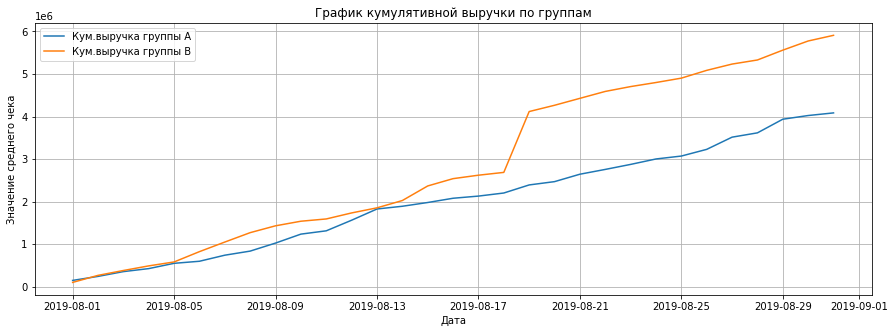

In [25]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.legend() 
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Значение среднего чека');

выручки от двух групп росли примерно одинакого до 19 августа, именно в этот момент произошел резкий рост выручки от группы B, предпологаю, что это был очень крупный заказ. Далее выручки росли снова в схожем темпе.

**График кумулятивного среднего чека по группам**

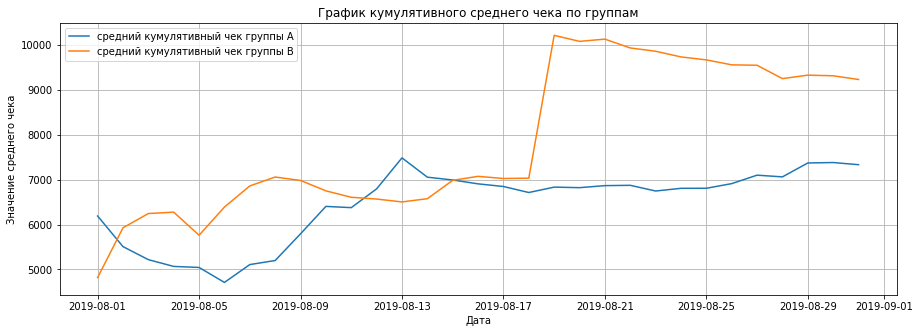

In [26]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Значение среднего чека')
plt.legend() ;

Средний кумулятивный чек группы B резко вырос 19 августа, до 15 августа средние чеки были не стабильны, трудно сказать чей чек больше, а после 15го августа чек группы B стал значительно больше чека группа  А -  это влияние того же большого заказа, который отображался на прошлом графике. Однако, чек B идет на спад, а чек А медленно , но постепенно растет. 

**График относительного изменения кумулятивного среднего чека группы B к группе A**

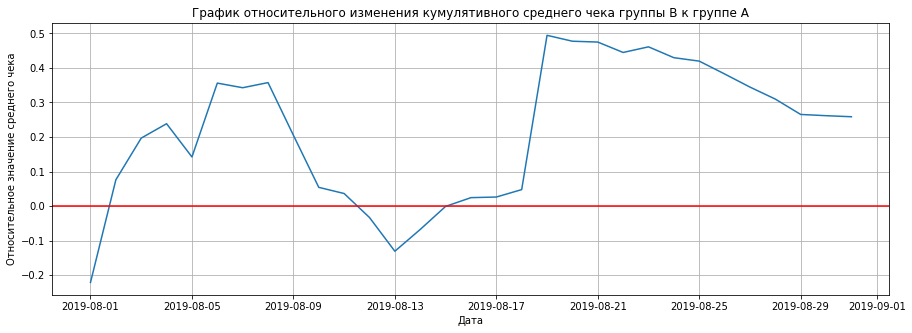

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное значение среднего чека')
plt.axhline(y=0, color='red') ;

кумулятивный средний чек B Средний чек А 2 августа и весь месяц был выше него, кроме 13 августа, исходя из предыдущего графика, можно сделать вывод что причиной этого стал крупный заказ в группе А и относительно небольшие заказы в группе B

 **График кумулятивного среднего количества заказов на посетителя по группам**


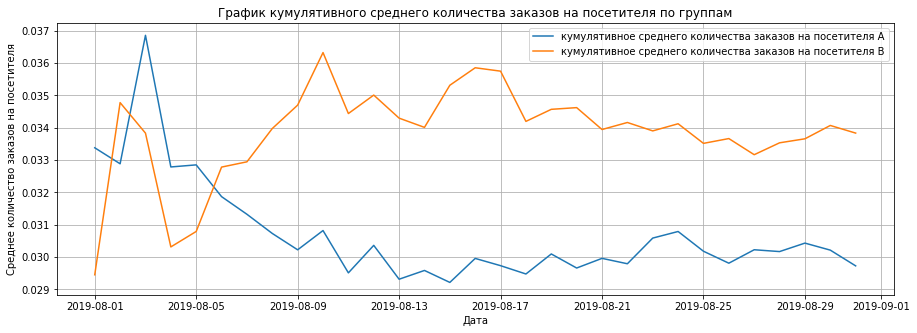

In [28]:
cumulativeData['avg_count_orders'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_count_orders'], label='кумулятивное среднего количества заказов на посетителя A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_count_orders'], label='кумулятивное среднего количества заказов на посетителя B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Cреднее количество заказов на посетителя')
plt.legend();
# plt.axis(["2019-08-01", '2019-08-31', 0.028, 0.038]) ;

С начала месяца с 1-5 августа среднее количество заказов на посетителя "A" была значительно больше, даже 3 августа оно было максимальным за весь период наблюдения между группами (исключение 2 августа); и после пика оно пошло на спад, а начиная с 9 августа находилось на в минимальном диапазоне 0,029-0,031. Среднее количество заказов на посетителя "B" с 4 августа стало расти и уже 6 августа превысило показатели группы "A" и росло до 10 августа чуть выше 0,036; затем пошло постепенное снижение, с имевшем место всплеском роста среднего количества заказов  15-17 августа до чуть ниже 0,036. Можно сделать вывод - среднее количество заказов на посетителя группы "B" в целом значительно больше "A" (начиная с 6 августа стабильно среднее кол- во заказов "B" больше A"")

**График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

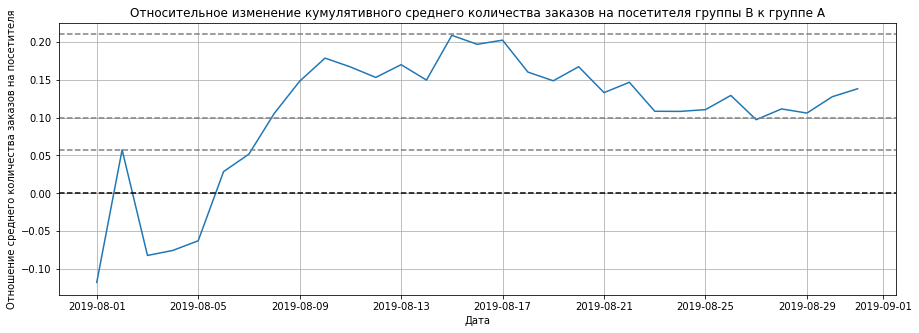

In [29]:
mergedCumulativeAvg_count_orders = cumulativeDataA[['date','avg_count_orders']].merge(cumulativeDataB[['date','avg_count_orders']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeAvg_count_orders['date'], mergedCumulativeAvg_count_orders['avg_count_ordersB']/mergedCumulativeAvg_count_orders['avg_count_ordersA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов на посетителя')
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--');

С 1 авгста по 5 - несколько дней когда среднеt количествj заказов на посетителя группы "A" была больше на 5-10%; но исключение в этот период это 2 августа - был сильный рост кол-ва заказов в группе "B" и по итогу дня результат "B" был на 5% больше "A" (надо отметить, что 2 августа был сильный рост кол-ва заказов в обоих группах, скорее всего на это повлиял общий фактор такой как скидки или акции. Начиная с 6 августа группа "B" лидировала до конца периода; её среднее количество заказов на посетителя росло до 15 августа и разница с "A" на максимуме составила 21%, затем пошло постепенное снижение относительного изменения кумулятивного среднего количества заказов на посетителя группы до 10%-14%.

**График количества заказов по пользователям**

In [30]:
orders_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

orders_users.columns = ['user_id','orders']

orders_users.sort_values(by='orders',ascending=False).head()

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


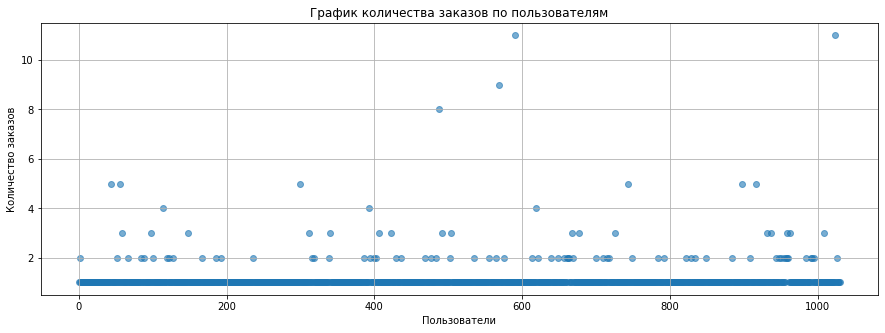

In [31]:
grafic = pd.Series(range(0,len(orders_users)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.scatter(grafic, orders_users['orders'], alpha=0.6) 

В основном пользователи делают один заказ, тех кто делает более 2х заказов - единицы, думаю можно не учитывать таких пользователей, предолагаю считать это вбросами.

95-й и 99-й перцентили количества заказов на пользователя

In [32]:
 np.percentile(orders_users['orders'], [95, 99])

array([2., 4.])

не более 5% пользователей делают 2 заказа и не более 1 процента делают 4 заказа. Теперь точно можно сказать , что 3 и более заказа это выбросы


**Точечный график стоимостей заказов**

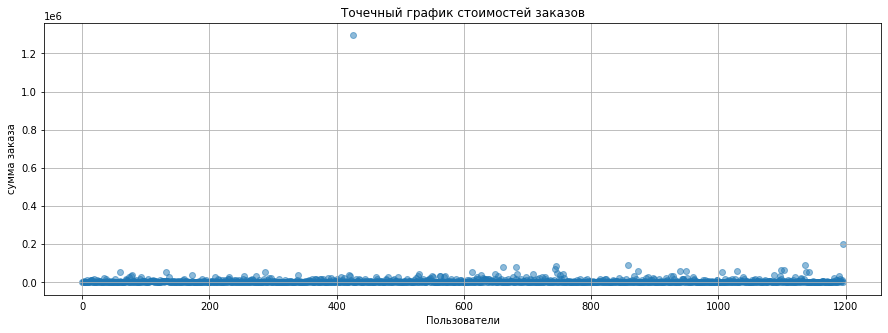

In [33]:
grafic = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('сумма заказа')
plt.scatter(grafic, orders['revenue'], alpha=0.5)

на графике присутствует явная аномалия со стоимостью около 1,3млн,так же из графика выбивается заказ на 200 тысяч, исключим их и график будет более наглядным

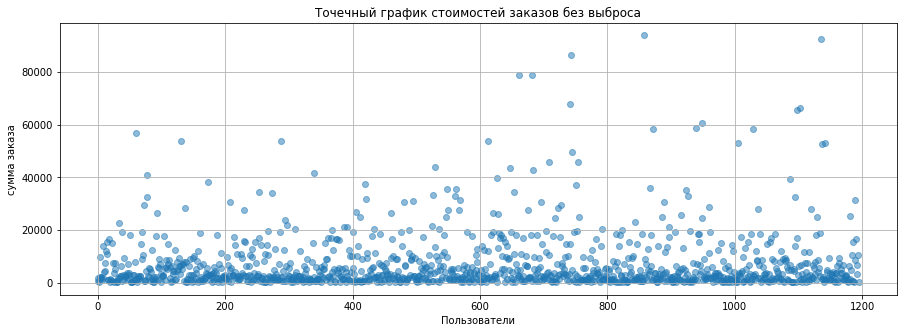

In [34]:
new_orders = orders[orders['revenue']<200000]
grafic = pd.Series(range(0,len(new_orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов без выброса')
plt.xlabel('Пользователи')
plt.ylabel('сумма заказа')
plt.scatter(grafic, new_orders['revenue'], alpha=0.5)


Более часто пользователи делают дешевые заказы, в пределах 5-6 тыс. Большая часть заказов находится в пределах 20 тыс. 

 **95-й и 99-й перцентили стоимости заказов**

In [35]:
np.percentile(orders['revenue'], [95, 99])


array([28000. , 58233.2])

1% заказов больше суммы в 58233.2 ,все заказы выше этой суммы предлагаю считать анамальными.

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

Нулевая гипотеза: статистически значимых различий в среднем числе заказов между группами нет;
Альтернативная гипотеза: статистически значимые различия в среднем числе заказов между группами есть

In [36]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [37]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  31 non-null     datetime64[ns]
 1   ordersPerDateA        31 non-null     int64         
 2   revenuePerDateA       31 non-null     int64         
 3   ordersPerDateB        31 non-null     int64         
 4   revenuePerDateB       31 non-null     int64         
 5   ordersCummulativeA    31 non-null     int64         
 6   revenueCummulativeA   31 non-null     int64         
 7   ordersCummulativeB    31 non-null     int64         
 8   revenueCummulativeB   31 non-null     int64         
 9   visitorsPerDateA      31 non-null     int64         
 10  visitorsPerDateB      31 non-null     int64         
 11  visitorsCummulativeA  31 non-null     int64         
 12  visitorsCummulativeB  31 non-null     int64         
dtypes: datetime64[ns](1), 

In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [40]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

0.017
0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выйгрыш группы B равен 13.8% — второе число в выводе

**Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным**

Нулевая гипотеза: статистически значимых различий в среднем числе заказов между группами нет; Альтернативная гипотеза: статистически значимые различия в среднем числе заказов между группами есть

In [42]:
alpha =0.05
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

In [43]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99]).max()]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего ненормальных :) пользователей =" ,len(abnormalUsers))

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
Name: visitorId, dtype: int64
Всего ненормальных :) пользователей = 31


**статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

In [44]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам,

    Нулевая гипотеза: "статистически значимых различий в конверсии между группами нет"; 
    Альтернативная гипотеза: "статистически значимые различия есть".

In [45]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174


Вывод: p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%)

 **статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным**

In [46]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020


P-value больше чем alpha . Отвергать нулевую гипотезу и считать, что в среднем чеке есть различия нельзя!

 **И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 17,4% по "очищенным" и 13.8% по "сырым" данным.
 По "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на ~26%, - и всё это из-за одного того самого аномального заказа. Результаты тестирования вполне однозначны. В итоге можно принять решение остановить тестирование и констатировать успех и победу группы B.**